# Исследование данных о продажах компьютерных игр

_____
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    
_____
**Цель исследования:**

Провести анализ данных для прогнозирования продаж компьютерных игр в интернет-магазине «Стримчик» на 2017 год.
    
_____
**Задачи исследования:**

Выявить закономерности, определяющие успешность игры.
_____
**Исходные данные:**
    
Таблица в формате csv: 'games.csv'

Name — название игры;

Platform — платформа;

Year_of_Release — год выпуска;

Genre — жанр игры;

NA_sales — продажи в Северной Америке (миллионы проданных копий);

EU_sales — продажи в Европе (миллионы проданных копий);

JP_sales — продажи в Японии (миллионы проданных копий);

Other_sales — продажи в других странах (миллионы проданных копий);

Critic_Score — оценка критиков (максимум 100);

User_Score — оценка пользователей (максимум 10);

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации:***
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

***Часть 2. Подготовка данных:***
* [1. Переименование столбцов.](#2-bullet)
* [2. Приведение данных к нужным типам.](#3-bullet)
* [3. Обработка пропусков.](#4-bullet)
* [4. Посчет суммарных продаж во всех регионах.](#5-bullet)
* [5. Нахождение и исправление аномалий и ошибок.](#6-bullet)

***Часть 3. Исследовательский анализ данных:***
* [1. Изучение количества выпущенных игр за весь период времени.](#7-bullet)
* [2. Построение по платформам распределений продаж игр по годам.](#8-bullet)
* [3. Выбор актуального периода.](#9-bullet)
* [4. Выбор нескольких потенциально прибыльных платформ.](#10-bullet)
* [5. Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#11-bullet)
* [6. Изучение влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы.](#12-bullet)
* [7. Изучение влияния отзывов пользователей и критиков на продажи на других платформах.](#13-bullet)
* [8. Выявление самых прибыльных жанров.](#14-bullet)

***Часть 4. Составление портрета пользователя каждого региона (NA, EU, JP):***
* [1. Определение самых популярных платформ для регионов.](#15-bullet)
* [2. Определение самых популярных жанров для регионов.](#16-bullet)
* [3. Определение влияния рейтинга ESRB на продажи.](#17-bullet)

***Часть 5. Проверка гипотез:***
* [1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#18-bullet)
* [2. Средние пользовательские рейтинги жанров Action и Sports разные.](#19-bullet)

***Часть 5. Общий вывод:***
* [1. Вывод.](#20-bullet)

## Изучение общей информации


### Изученеие файлов с данными, получение общей информации, загрузка библиотек

<a id="1-bullet"></a>

In [1]:
#импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import statistics 
import warnings

warnings.filterwarnings("ignore")

In [2]:
#читаем csv файл 
try:
    data = pd.read_csv('/Users/denisbotvinovskii/Documents/bootcamp/project6/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
#Выводим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Выводим первые 5 строчек датафрейма
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Посмотрим, есть ли в нашем датафрейме явные дубликаты, используем методы duplicated() и sum()
data.duplicated().sum()

0

Явных дубликатов в данных нет.

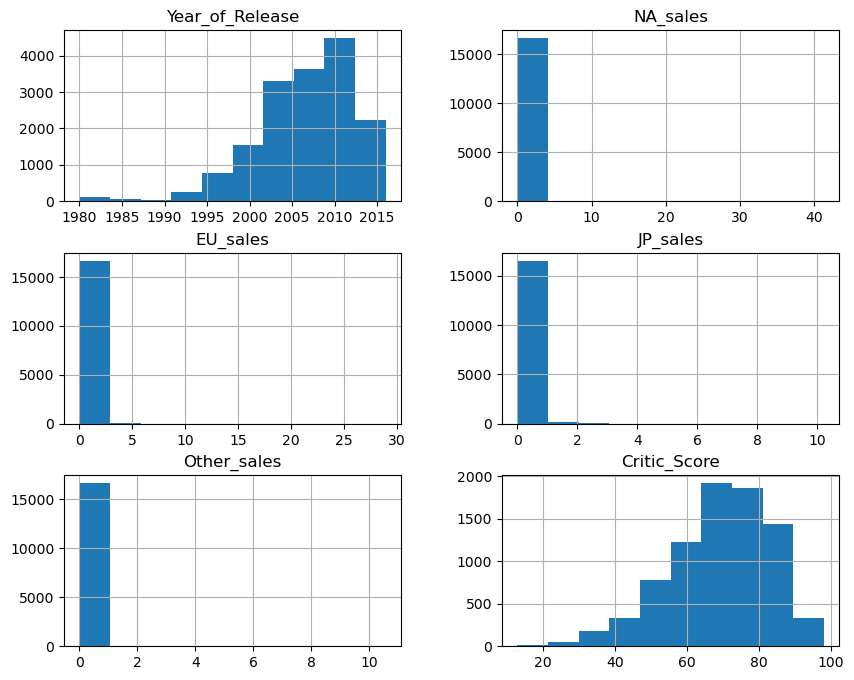

In [6]:
#Строим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(10,8));

**Вывод:** Изучили общую информацию о нашем датасете, в котором 11 столбцов и 16715 строк, есть пропущенные значения,  импортировали нужные библиотеки, установили отсутствие явных дубликатов, построили гистограмы, чтобы иметь общее предствление о распределении данных. Необходимо переименовать столбцы, изменить некоторые типы данных для дальнейшей работы.

## Предобработка данных

###  Переименование столбцов

<a id="2-bullet"></a>

In [7]:
#Приведем к нижнему регистру с помощью метода str.lower()
data.columns = data.columns.str.lower()

In [8]:
#Выведем названия столбцов после изменения 
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Приведение данных к нужным типам

<a id="3-bullet"></a>

Из общей информации выведеной ранее видно, что в столбце 'user_score' тип object, а хранимые значения численные, поэтому изменим тип данных на необходимый (float).

In [9]:
#Для начала посмотрим на уникальные значения в данном столбце
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [10]:
#Оценим количество значений
data['user_score'].value_counts(dropna=False).head(20)

NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
Name: user_score, dtype: int64

В полученных значениях есть одно строкового формата - 'tbd'. Поэтому мы не можем привести все данные к одному типу.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть пользователи еще не поставили оценку игре. Заполнить эти данные числами невозможно. Поэтому создадим новый столбец без строк с 'tbd'.

In [11]:
data['user_score_new'] = data.query('user_score != "tbd"')['user_score']

In [12]:
#Снова выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  user_score_new   7590 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


Мы видим, что количество строк сократилось в новом столбце, однако этих данных достаточно, и они соразмерны числу строк в похожем столбце с оценкой критиков 'critic_score'. Теперь мы можем изменить тип данных.

In [13]:
data['user_score_new'] = data['user_score_new'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  user_score_new   7590 non-null   float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


В остальных столбцах верные типы данных. Если обратить внимание на столбец с годом выпуска 'year_of_release', и его тип данных float, можно применить формат даты, но для нашего исследования нет такой необходимости.

### Обработка пропусков

<a id="4-bullet"></a>

In [15]:
#Посчитаем количество пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
user_score_new     9125
dtype: int64

В найденных пропусках мы не можем сделать замену на какие-либо численные значения медианы или среднего, так как нет соответствующих данных в нашем датафрейме, а заполенение нулями оценок критиков и пользователей повлияют на их анализ.  Единсвтенное, мы можем заменить пропуски в столбце 'rating' на unknown, чтобы это не мешало дальнейшему исследованию.

In [16]:
data['rating'] = data['rating'].fillna('unknown')

In [17]:
data['rating'].value_counts()

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

 **Причины, которые могли привести к пропускам:** 
 
В случае с оценками в столбцах 'critic_score', 'user_score', возможно, данных нет, потому что пользователи и критики не рассматривали некоторые игры. В остальных - автоматизированная система сбора информации дала сбой или же разарабочики некорректно выгрузили данные.

### Посчет суммарных продаж во всех регионах

<a id="5-bullet"></a>

In [18]:
#Создадим новый столбец с суммарными продажами
data['sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_new,sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,NaN,31.38


### Нахождение и исправление аномалий и ошибок

<a id="6-bullet"></a>

Также дополнительно проверим нет ли в нашем датафрейме аномалий. 

In [19]:
#Выведем подробную информацию
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16446.0,2006.484616,5.877050,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16715.0,0.263377,0.813604,0.0,0.00,0.08,0.24,41.36
eu_sales,16715.0,0.145060,0.503339,0.0,0.00,0.02,0.11,28.96
jp_sales,16715.0,0.077617,0.308853,0.0,0.00,0.00,0.04,10.22
other_sales,16715.0,0.047342,0.186731,0.0,0.00,0.01,0.03,10.57
critic_score,8137.0,68.967679,13.938165,13.0,60.00,71.00,79.00,98.00
user_score_new,7590.0,7.125046,1.500006,0.0,6.40,7.50,8.20,9.70
sales,16715.0,0.533396,1.548261,0.0,0.06,0.17,0.47,82.54


Как видно из таблицы явных аномалий нет, все значения соответствуют ожиданиям.

**Вывод:** В разделе "Предобработка данных" мы заменили названия столбцов, преобразовали данные в нужные типы, а именно в столбце с пользовательской оценкой, исследовали пропуски в данных и не удаляли их, потому что это могло помешать нам для дальнейшего анализа, обратили внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей и приняли определнные меры, проверили аномалии в данных и посчитали суммарные продажи во всех регионах.

## Проведите исследовательский анализ данных

### Изучение количества выпущенных игр за весь период времени

<a id="7-bullet"></a>

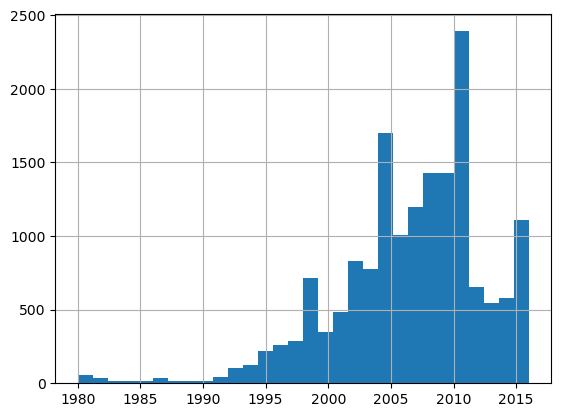

In [20]:
#Построим гистограмму игр по годам выпуска
data['year_of_release'].hist(bins=30);

In [21]:
#Найдем дубликаты игр по годам
data.duplicated(subset=['name', 'year_of_release']).sum()

4287

In [22]:
#Удалим найденные дубликаты из всего датафрейма и оставим первый
data = data.drop_duplicates(subset=['name', 'year_of_release'], keep='first')

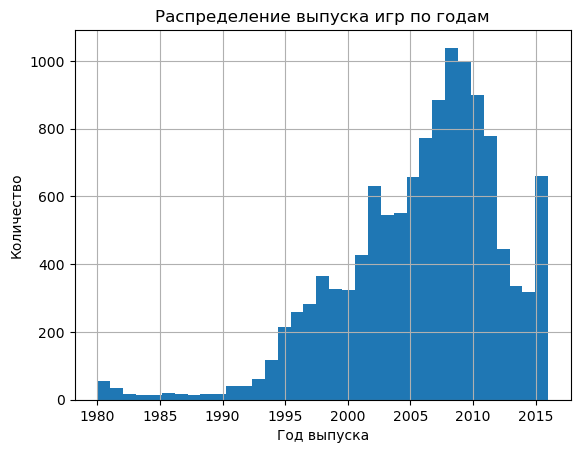

In [23]:
#Теперь построим гистограмму по измененному датафрейму 
data['year_of_release'].hist(bins=35);
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество');

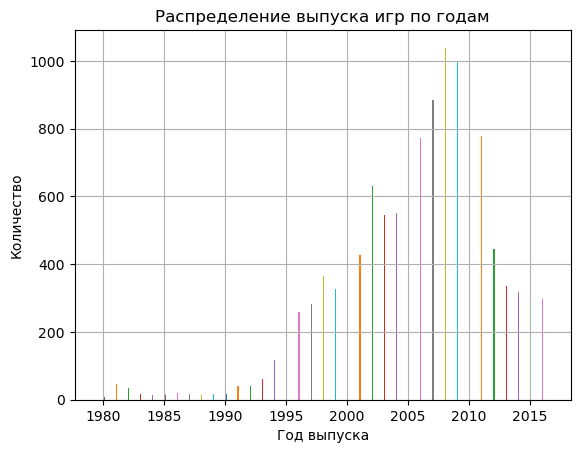

In [24]:
data.groupby('year_of_release')['year_of_release'].hist()
plt.title('Распределение выпуска игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество');

**Вывод:** Как видно из графика, активный рост выпуска компьютерных игр был после 1995 года. Больше всего выпускались игры в 2008-2009 годах, потом был спад, и после 2015 года количество игр начало увеличиваться.  

### Построение по платформам распределений продаж игр по годам 

<a id="8-bullet"></a>

In [25]:
#Сделаем сводную таблицу по платформам и суммарными продажами, чтобы найти топ-5 с наибольшей суммой продаж
data_platform = data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(by='sales', ascending=False)
data_platform.head()

,sales
platform,
PS2,1164.63
Wii,800.85
DS,719.82
PS,718.57
X360,592.75


Построим для каждой из 5 платформ график распределения продаж по годам, чтобы найти временной интервал активности.

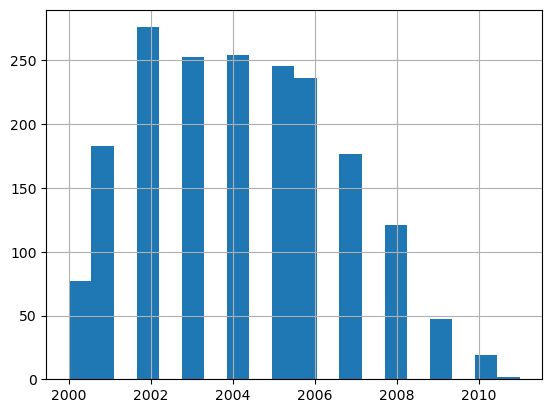

In [26]:
data.query('platform == "PS2"')['year_of_release'].hist(bins=20);

In [27]:
#Создадим список с топовыми платформами с использованием метода tolist() и среза по индексу
list_platform = data_platform.index[:5].tolist()
list_platform

['PS2', 'Wii', 'DS', 'PS', 'X360']

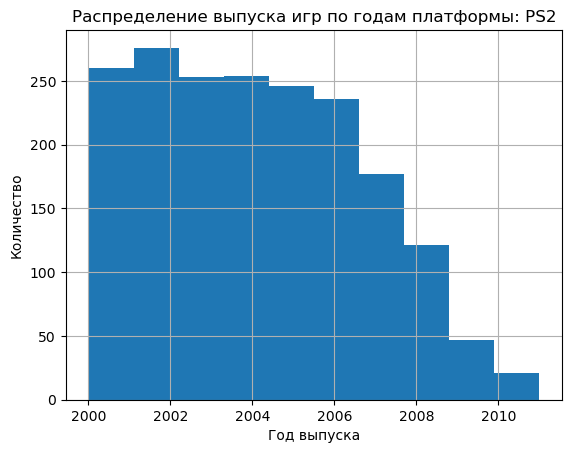

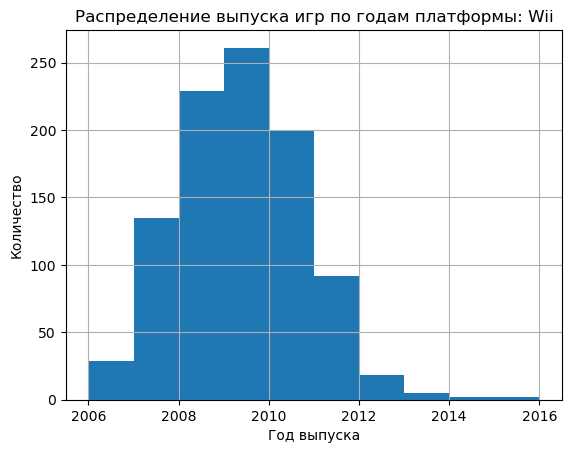

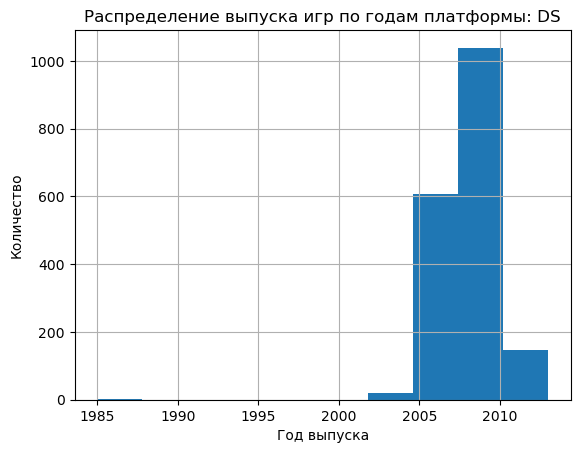

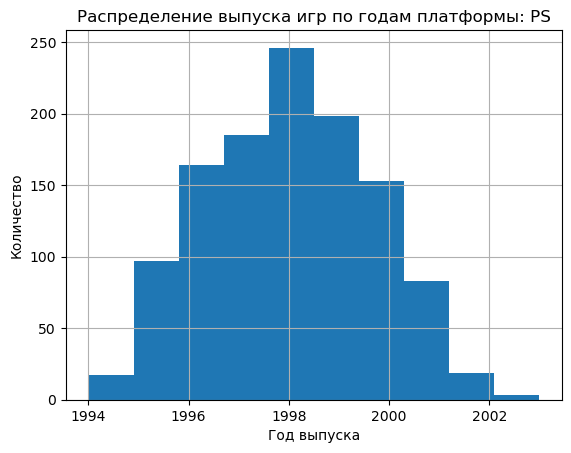

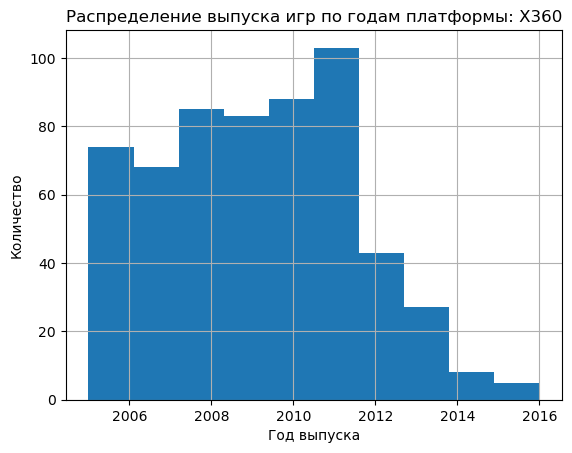

In [28]:
#Построим для каждой из 5 платформ график распределения выпуска игр по годам, переберем в цикле платформы из 
#сформированного списка и применим для каждой метод .hist() 
for plat in list_platform:
    data.query('platform == @plat')['year_of_release'].hist(bins=10)
    plt.title(f'Распределение выпуска игр по годам платформы: {plat}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Количество')
    plt.show()
    

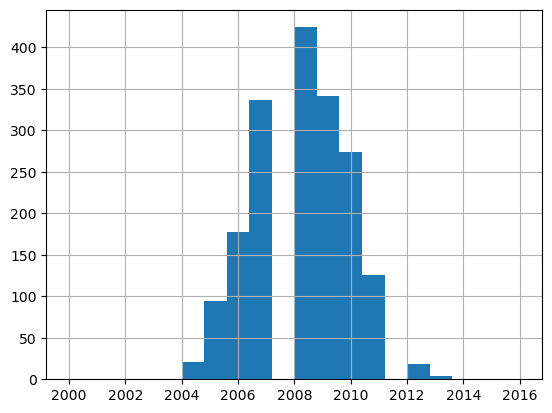

In [29]:
data.query('platform == "DS"')['year_of_release'].hist(bins=20, range=(2000, 2016));

Период существования платформы "DS" примерно 10 лет

**Вывод:**

Период существования одной платформы составляет примерно 10 лет. Это видно из наших графиков, для выявления интервала обратим внимание на первый и последний год выпуска игр.

- Платформа 'PS2' : 2000-2010, период - 10 лет

- Платформа 'Wii' : 2006-2016, период - 10 лет

- Платформа 'DS' : 2004-2014, , период - 10 лет, если не считать единичный случай выпуска в 1985 году

- Платформа 'PS' : 1994-2002, период - 10 лет

- Платформа 'X360' : 2006-2016, период - 10 лет

Построим общий график для 5 платформ, для этого создадим список платформ, сделаем срез и сгруппируем

In [30]:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
data_p = data.query('platform.isin(@platform_list)')

In [31]:
data_pp = data_p.T
data_pp

,0,2,3,6,7,8,10,11,13,14,...,16675,16676,16683,16685,16686,16689,16698,16700,16704,16711
name,Wii Sports,Mario Kart Wii,Wii Sports Resort,New Super Mario Bros.,Wii Play,New Super Mario Bros. Wii,Nintendogs,Mario Kart DS,Wii Fit,Kinect Adventures!,...,Original Frisbee Disc Sports: Ultimate & Golf,G1 Jockey 4 2008,Scarlett: Nichijou no Kyoukaisen,Help Wanted: 50 Wacky Jobs (jp sales),Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Real Rode,Mega Brain Boost,Mezase!! Tsuri Master DS,Plushees,LMA Manager 2007
platform,Wii,Wii,Wii,DS,Wii,Wii,DS,DS,Wii,X360,...,DS,PS3,PS2,Wii,Wii,PS2,DS,DS,DS,X360
year_of_release,2006.0,2008.0,2009.0,2006.0,2006.0,2009.0,2005.0,2005.0,2007.0,2010.0,...,2007.0,2008.0,2008.0,2008.0,2008.0,2008.0,2008.0,2009.0,2008.0,2006.0
genre,Sports,Racing,Sports,Platform,Misc,Platform,Simulation,Racing,Sports,Misc,...,Action,Sports,Adventure,Simulation,Racing,Adventure,Puzzle,Sports,Simulation,Sports
na_sales,41.36,15.68,15.61,11.28,13.96,14.44,9.05,9.71,8.92,15.0,...,0.01,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.0
eu_sales,28.96,12.76,10.93,9.14,9.18,6.94,10.95,7.47,8.03,4.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01
jp_sales,3.77,3.79,3.28,6.5,2.93,4.7,1.93,4.13,3.6,0.24,...,0.0,0.0,0.01,0.01,0.01,0.01,0.0,0.01,0.0,0.0
other_sales,8.45,3.29,2.95,2.88,2.84,2.24,2.74,1.9,2.15,1.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
critic_score,76.0,82.0,80.0,89.0,58.0,87.0,NaN,91.0,80.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN
user_score,8,8.3,8,8.5,6.6,8.4,NaN,8.6,7.7,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,tbd,NaN


(2000.0, 2016.0)

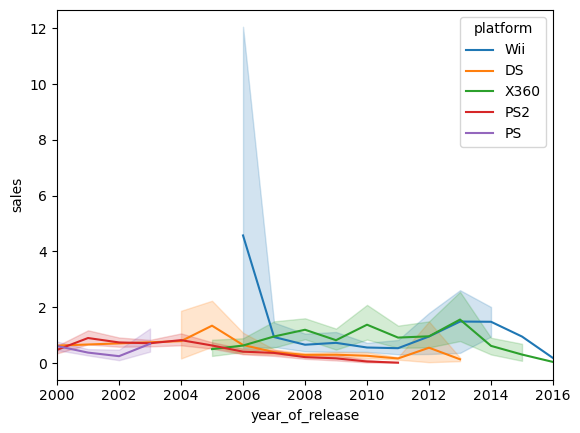

In [32]:
data_lnplt = data.query('platform.isin(@list_platform)')
sns.lineplot(data=data_lnplt, x='year_of_release', y='sales', hue='platform');
plt.xlim(2000,2016)

### Выбор актуального периода

<a id="9-bullet"></a>

Для целей прогнозирования продаж на следующий год в такой динамично меняющейся индустрии, как компьютерные игры не стоит брать слишком большой временной интервал. В нашем случае возьмем данные за последние 3 года: 2014, 2015 и неполный 2016.

In [33]:
#Сделаем срез по нашим данным и создадим новый датафрейм, чтобы не удалять из существующего
data_actual = data.query('year_of_release > 2013')

### Выбор нескольких потенциально прибыльных платформ

<a id="10-bullet"></a>

Для выявления лидеров платформ по продажам, а также потенциально прибыльных платформ, построим сводную таблицу по платформам, годам и с сумой продаж

In [34]:
data_p = data_actual.pivot_table(index='platform', columns='year_of_release', values='sales', aggfunc='sum', margins=True)
data_p

year_of_release,2014.0,2015.0,2016.0,All
platform,,,,
3DS,41.36,26.89,14.83,83.08
PC,6.92,3.33,2.08,12.33
PS3,17.00,1.71,0.06,18.77
PS4,92.31,115.27,67.81,275.39
PSP,0.09,0.10,NaN,0.19
PSV,6.86,5.04,2.33,14.23
Wii,2.96,0.95,0.18,4.09
WiiU,13.16,13.85,3.71,30.72
X360,4.93,1.22,0.04,6.19


In [35]:
#Добавим новый индекс в таблицу
data_p.reset_index()

year_of_release,platform,2014.0,2015.0,2016.0,All
0,3DS,41.36,26.89,14.83,83.08
1,PC,6.92,3.33,2.08,12.33
2,PS3,17.00,1.71,0.06,18.77
3,PS4,92.31,115.27,67.81,275.39
4,PSP,0.09,0.10,NaN,0.19
5,PSV,6.86,5.04,2.33,14.23
6,Wii,2.96,0.95,0.18,4.09
7,WiiU,13.16,13.85,3.71,30.72
8,X360,4.93,1.22,0.04,6.19
9,XOne,10.01,12.55,3.23,25.79


In [36]:
#Переименуем колонки
data_p.columns=['2014', '2015', '2016', 'all']

Так как нам нужно найти потенциально прибыльные платформы, а жизненный цикл каждой платформы составляет примерно 10 лет, необходимо взять те платформы, которые еще существуют на рынке в 2016 году. Для этого удалим из сводной таблицы не актуальные платформы.

In [37]:
#Удалим пустые строки по 2016 году
data_p = data_p.dropna(subset=['2016'])
data_p

,2014,2015,2016,all
platform,,,,
3DS,41.36,26.89,14.83,83.08
PC,6.92,3.33,2.08,12.33
PS3,17.00,1.71,0.06,18.77
PS4,92.31,115.27,67.81,275.39
PSV,6.86,5.04,2.33,14.23
Wii,2.96,0.95,0.18,4.09
WiiU,13.16,13.85,3.71,30.72
X360,4.93,1.22,0.04,6.19
XOne,10.01,12.55,3.23,25.79


Чтобы посмотреть тенденцию продаж игр платформ по продажам, построим общий график по платформам из сводной таблицы

In [38]:
#Определим, в виде массива numpy, то, что мы хотим видеть в виде подписей по ОХ
ticks = np.arange(2014, 2017, 1)

In [39]:
#Создадим список с платформами с использованием метода tolist() и среза по индексу
list_plt = data_p.index[:-1].tolist()
#Удалим из списка платформу 'PS3', потому что для нее мы будем строить отдельный график
list_plt.remove('PS3') 
list_plt

['3DS', 'PC', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

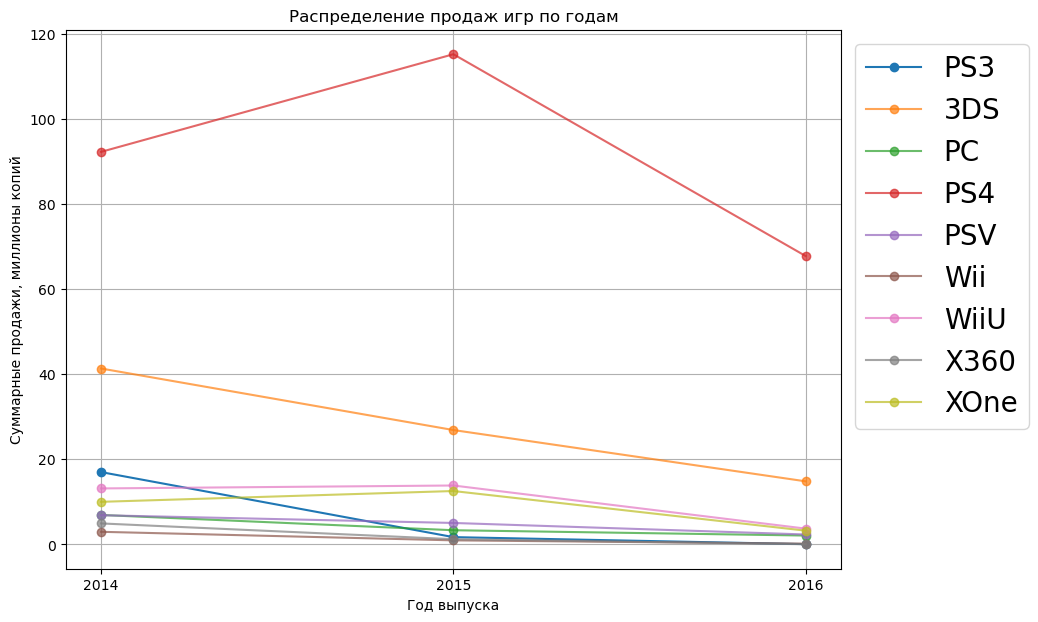

In [40]:
ax = data_actual.query('platform == "PS3"').pivot_table(index='year_of_release', values='sales', aggfunc='sum') \
.plot(grid=True, style='o-', figsize=(10,7), label='PS3')

for plat in list_plt:
    data_actual \
    .query('platform == @plat') \
    .pivot_table(index='year_of_release', values='sales', aggfunc='sum') \
    .plot(ax=ax, alpha=0.7, grid=True, style='o-', figsize=(10,7), xticks=ticks, label=plat);    
    plt.legend(['PS3', '3DS', 'PC', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne'], bbox_to_anchor=(1, 1), fontsize=20);
    plt.title('Распределение продаж игр по годам')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи, миллионы копий')

По графику можно заметить, что по суммарным продажам лидируют несколько платформ: 'PS3', 'X360', 'Wii', но их продажи на 2016 год падают, и жизненный цикл подходит к концу, соответственно они не потенциально прибыльны. 

Растут продажи у молодых платформ 'PS4', 'XOne', '3DS', они являются потенциально самыми прибыльными, так как данные за 2016 год не полные, и продажи могут вырасти. У таких платформ, как 'WiiU', 'PSV' продажи относительно низкие.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

<a id="11-bullet"></a>

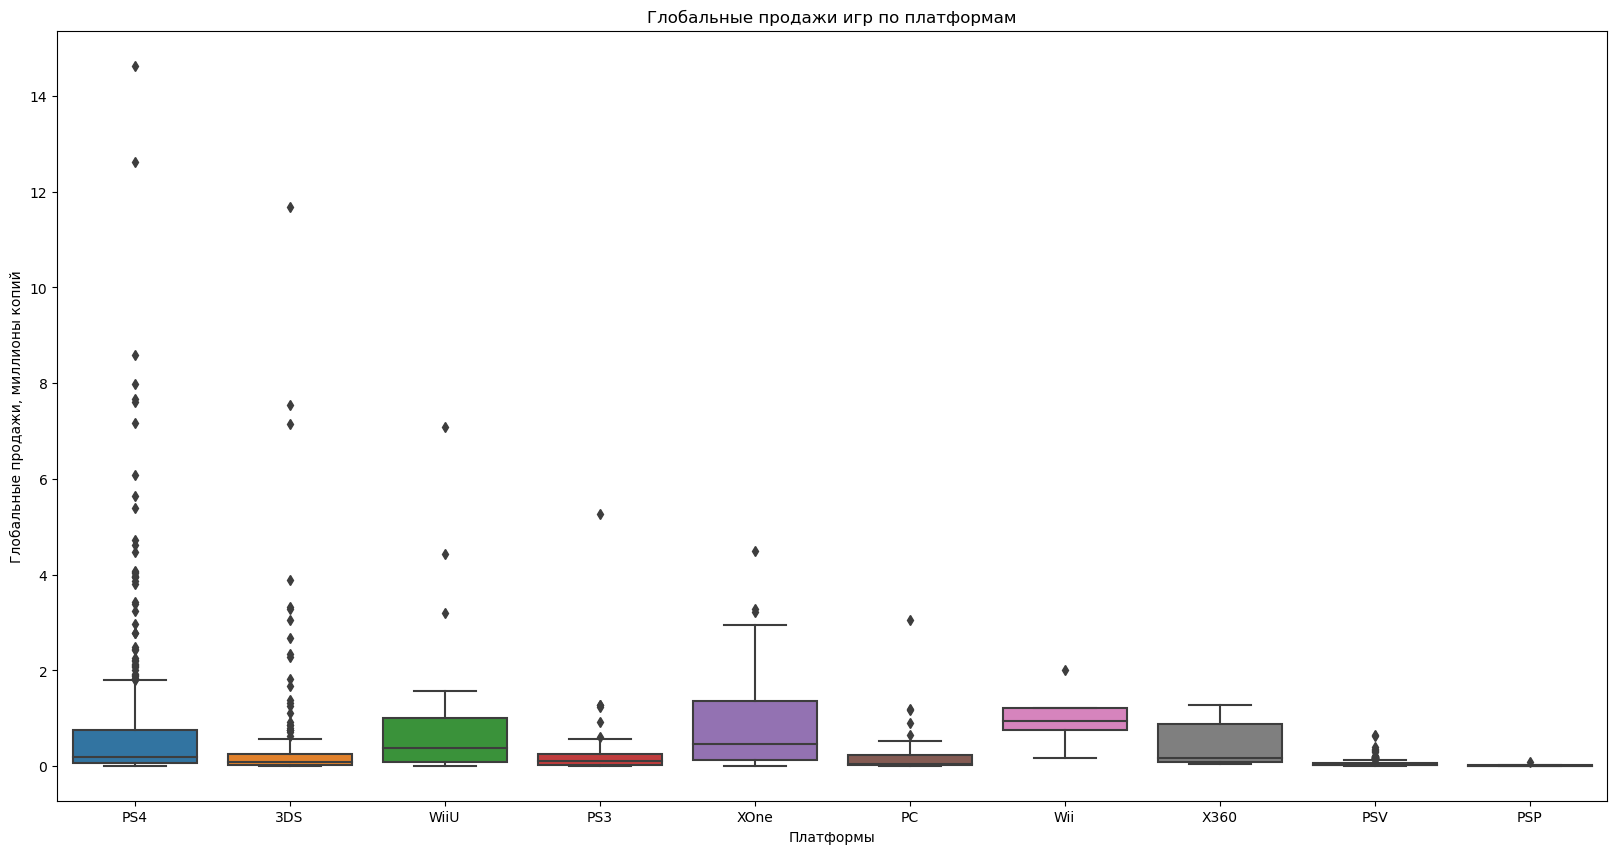

In [41]:
#Построим общий график «ящик с усами»  по глобальным продажам игр «sales» в разбивке по платформам
plt.figure(figsize=(20, 10))
sns.boxplot(x='platform', y='sales', data=data_actual);
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи, миллионы копий');

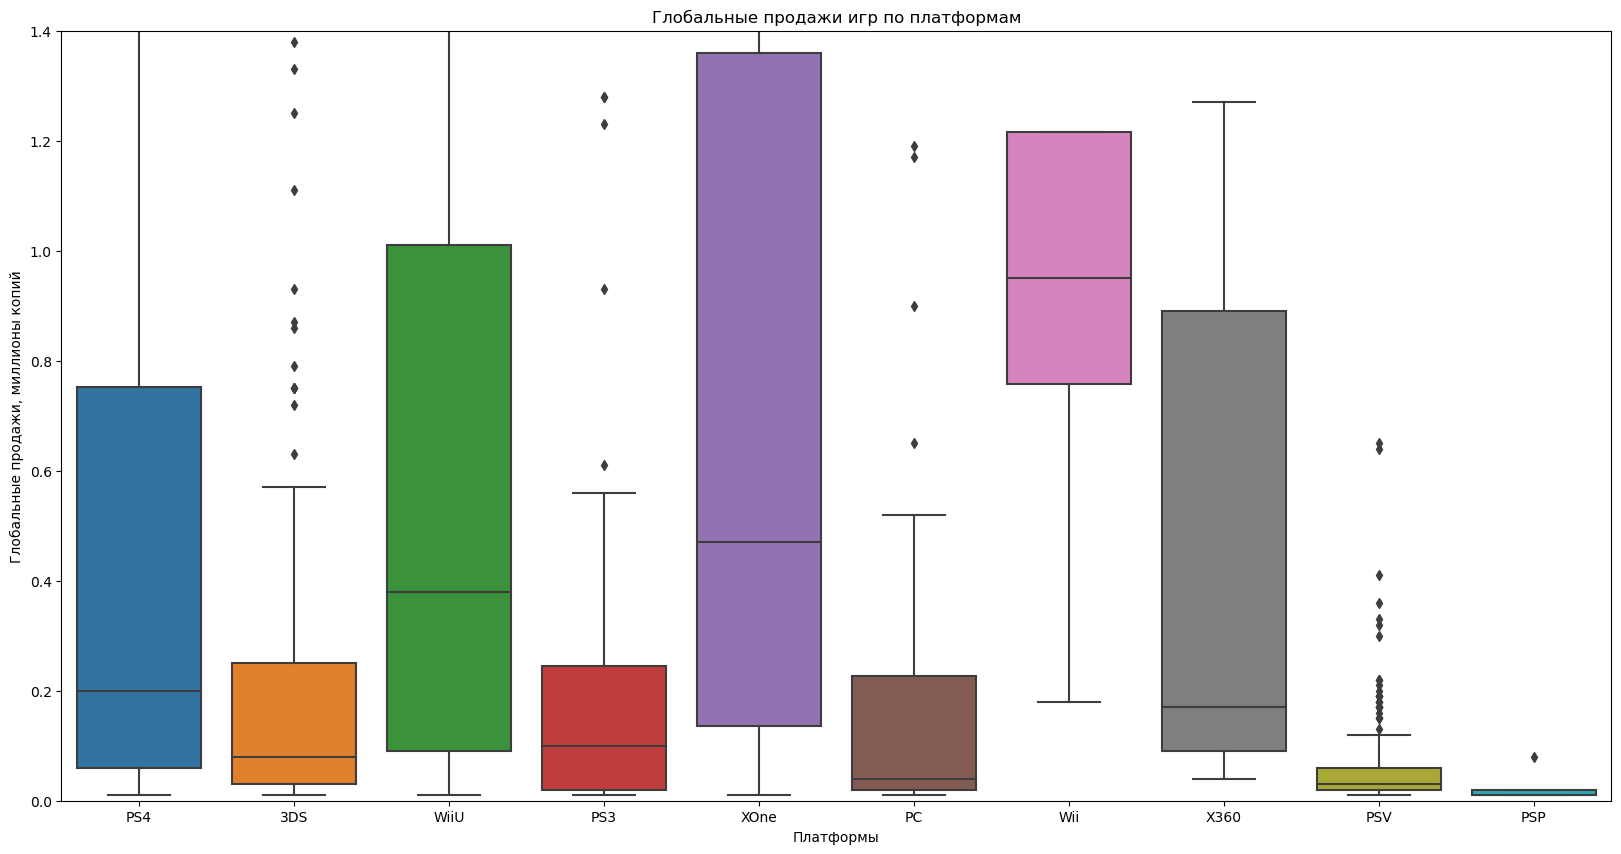

In [42]:
#Построим общий график «ящик с усами»  по глобальным продажам игр «sales» в разбивке по платформам с пределами
plt.figure(figsize=(20, 10))
sns.boxplot(x='platform', y='sales', data=data_actual);
plt.ylim(0, 1.4)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформы')
plt.ylabel('Глобальные продажи, миллионы копий');

In [43]:
data_actual.groupby('platform')['sales'].describe().T

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,197.000000,58.000000,71.000000,328.000000,9.000000,234.000000,4.00000,37.000000,13.000000,27.000000
mean,0.421726,0.212586,0.264366,0.839604,0.021111,0.060812,1.02250,0.830270,0.476154,0.955185
std,1.230707,0.462380,0.664241,1.700656,0.022608,0.084314,0.75177,1.391503,0.464606,1.216652
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.18000,0.010000,0.040000,0.010000
25%,0.030000,0.020000,0.020000,0.060000,0.010000,0.020000,0.75750,0.090000,0.090000,0.135000
50%,0.080000,0.040000,0.100000,0.200000,0.010000,0.030000,0.95000,0.380000,0.170000,0.470000
75%,0.250000,0.227500,0.245000,0.752500,0.020000,0.060000,1.21500,1.010000,0.890000,1.360000
max,11.680000,3.050000,5.270000,14.630000,0.080000,0.650000,2.01000,7.090000,1.270000,4.490000


**Вывод:** Исходя из графика и таблицы видно, что основные продажи игр находятся в промежутке от 0.1 до 1.4 (миллионов проданных копий), самые прибыльные платформы: 'XOne', 'Wii', 'WiiU', 'PS4', 'X360'. Выделяется медианное значение у платформы 'Wii'. Медианы располагаются в интервале 0.03 - 0.47, если не рассматривать минимальное и максимальное значение платформ 'Wii' и 'PSP'.

### Изучение влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы

<a id="12-bullet"></a>

Выберем для рассмотрения популярную платформу 'PS4'

In [44]:
#Создадим отдельный датасет для данной платформы
data_cor = data_actual.query('platform == "PS4"')

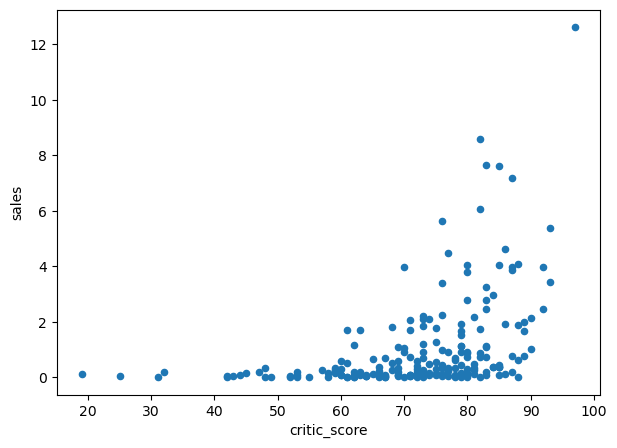

In [45]:
#Построим диаграмму рассеивания для выявления зависисмости между продажами и оценоками критиков
data_cor.plot(y='sales', x='critic_score', kind='scatter', figsize=(7,5)); 

In [46]:
#Посчитаем коэффициент корреляции продаж и оценок критиков
data_cor['sales'].corr(data_cor['critic_score'])

0.42500404910126516

По графику и найденному коэф корреляции 0.42 можно сказать, что есть определенная зависимость между продажами и оценками критиков.

Теперь рассмотрим зависимость между продажами и оценками пользователей.

In [47]:
#Посчитаем коэффициент корреляции
data_cor['sales'].corr(data_cor['user_score_new'])

-0.030789529878820734

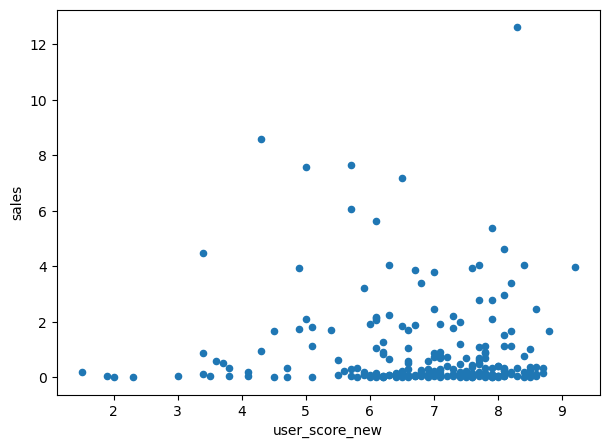

In [48]:
#Построим диаграмму рассеивания
data_cor.plot(y='sales', x='user_score_new', kind='scatter', figsize=(7,5));

По полученным результатам можно сделать вывод, что корреляция между количеством продаж и оценками пользователей не наблюдается, коэф корреляции равен -0.03.

### Изучение влияния отзывов пользователей и критиков на продажи на других платформах

<a id="13-bullet"></a>

Дополнительно рассмотрим несколько платформ

In [49]:
#Выберем несколько платформ c наибольшим количеством для анализа, исходя из найденной статистики с помощью describe()
plat_max = ['3DS', 'PS3', 'PSV']

Коэффициент корреляции 3DS: 0.2942662081116552


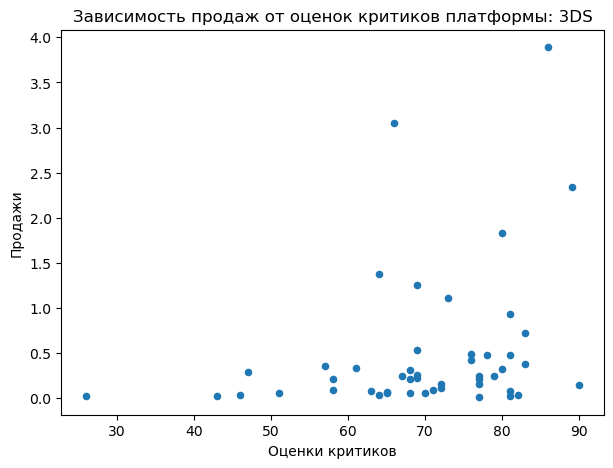

Коэффициент корреляции PS3: 0.5489157898435388


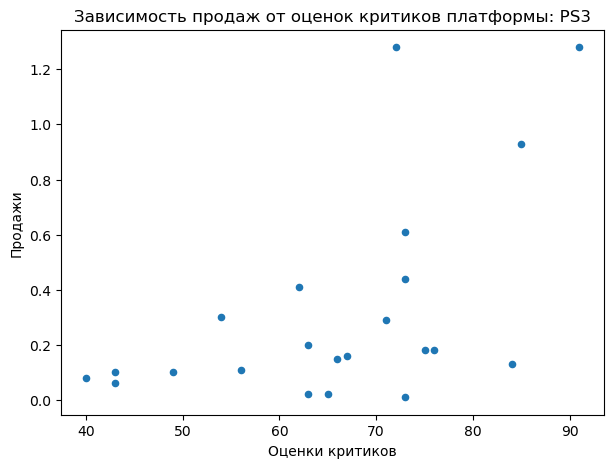

Коэффициент корреляции PSV: -0.01340955236284543


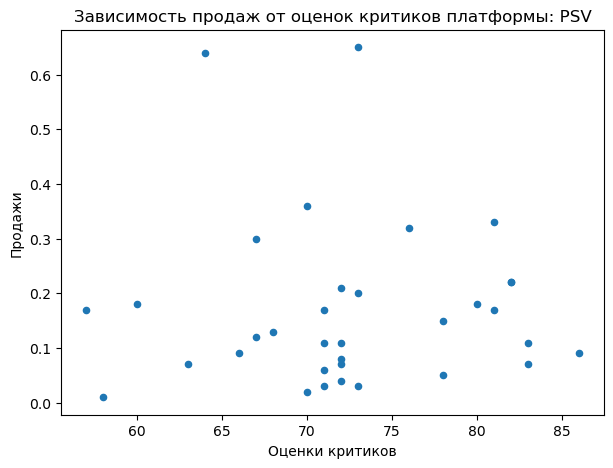

In [50]:
#Рассмотрим влияние оценок критиков на продажи внутри популярных платформ из списка 
for plat in plat_max:
    data_max = data_actual.query('platform == @plat')
    koef_cor = data_max['sales'].corr(data_max['critic_score'])
    print(f'Коэффициент корреляции {plat}: {koef_cor}')
    data_max.plot(y='sales', x='critic_score', kind='scatter', figsize=(7,5)); 
    plt.title(f'Зависимость продаж от оценок критиков платформы: {plat}')
    plt.xlabel('Оценки критиков')
    plt.ylabel('Продажи')
    plt.show()

In [51]:
#Составим список коэф корреляции и найдем медианное значение
list_cor1 = [0.42, 0.3, 0.55, -0.01]
statistics.median(list_cor1) 

0.36

Коэффициент корреляции 3DS: 0.24618455827978325


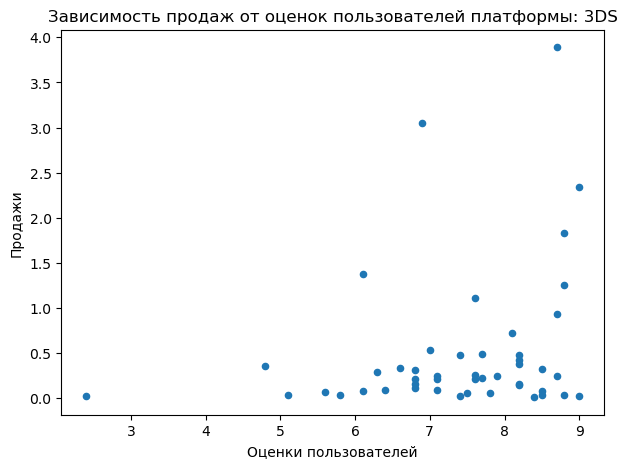

Коэффициент корреляции PS3: 0.29435778514235245


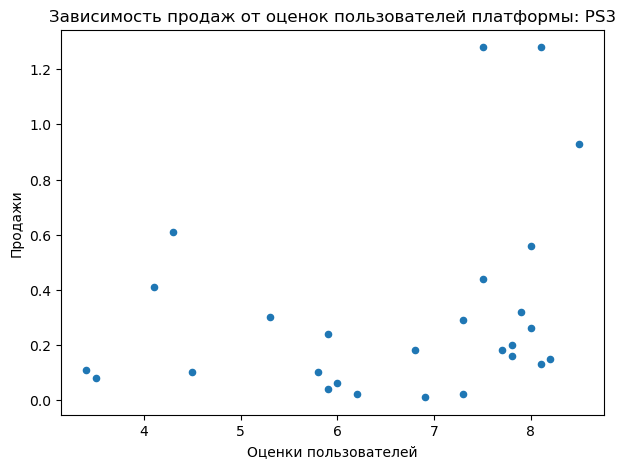

Коэффициент корреляции PSV: 0.02331943220209367


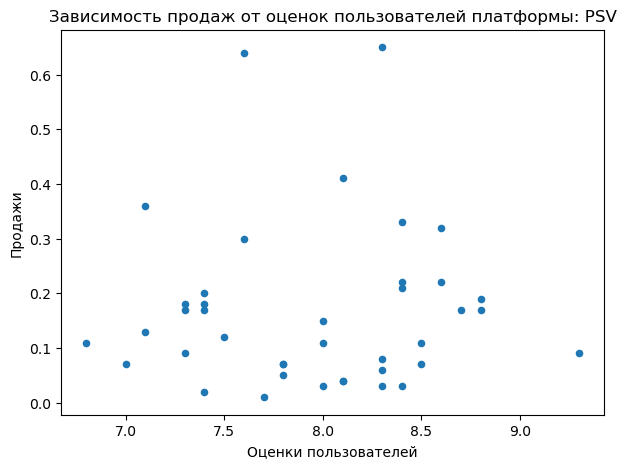

In [52]:
#Рассмотрим влияние оценок пользователей на продажи внутри популярных платформ из списка 
for plat in plat_max:
    data_max = data_actual.query('platform == @plat')
    koef_cor = data_max['sales'].corr(data_max['user_score_new'])
    print(f'Коэффициент корреляции {plat}: {koef_cor}')
    data_max.plot(y='sales', x='user_score_new', kind='scatter', figsize=(7,5)); 
    plt.title(f'Зависимость продаж от оценок пользователей платформы: {plat}')
    plt.xlabel('Оценки пользователей')
    plt.ylabel('Продажи')
    plt.show()

In [53]:
#Составим список коэф корреляции и найдем медианное значение
list_cor2 = [-0.03, 0.25, 0.29, 0.02]
statistics.median(list_cor2)

0.135

**Вывод:**

Мы рассмотрели популярную платформу 'PS4' и дополнительно '3DS', 'PS3', 'PSV'. 

Медианный коэффициент корреляции между количеством продаж игр и оценками критиков равен 0.36, то есть корреляция наблюдается. Мы видим, что те игры, которым эксперты дают высокие оценки - продаются лучше. 

Медианный коэффициент корреляции между количеством продаж игр и оценками пользователей равен 0.135, то есть линейная зависимость отсутствует.

### Выявление самых прибыльных жанров

<a id="14-bullet"></a>

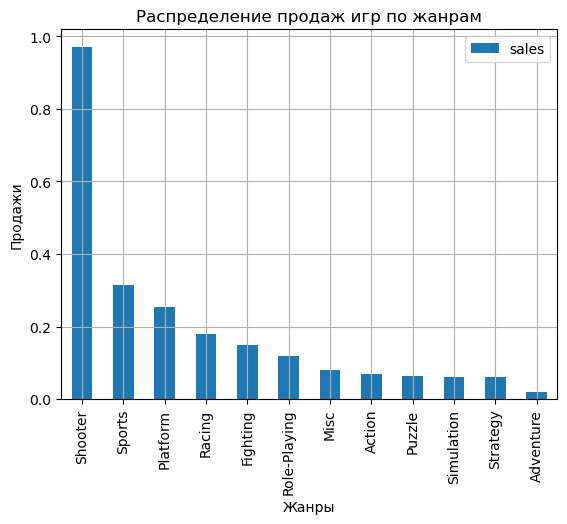

In [54]:
#Для анализа жанров компьютерных игр построим график распредедения общих продаж по жанрам
#Создадим сводную таблицу и построим столбчатую диаграмму
data_actual.pivot_table(index='genre', values='sales', aggfunc='median') \
.sort_values(by='sales', ascending=False).plot(grid=True, kind='bar')
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи');

**Вывод:** По графику ярко виден жанр с самыми высокими продажами - 'Shooter'.  Также прибыльными жанрами являются 'Sports' и  'Platform'. Самые низкие продажи у 'Adventure'.

## Составьте портрет пользователя каждого региона

### Определение самых популярных платформ для регионов

<a id="15-bullet"></a>

Найдем для каждого региона самые популярные платформы, для этого отдельно создадим сводные таблицы

In [55]:
#Находим топ-5 платформ для региона NA
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False).head()

,na_sales
platform,
PS4,94.19
3DS,21.10
XOne,15.07
WiiU,13.17
PS3,5.41


In [56]:
#Находим топ-5 платформ для региона EU
data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,125.15
3DS,14.44
WiiU,9.14
PC,8.64
XOne,8.23


In [57]:
#Находим топ-5 платформ для региона JP
data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,44.14
PS4,13.38
PSV,10.55
WiiU,6.23
PS3,5.29


Далее найдем долю продаж по платформам каждого региона от общей суммы. Для этого создадим одну сводную таблицу со всеми критериями.

In [58]:
data_sales = data_actual \
.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'sales'], aggfunc='sum') \
.sort_values(by='na_sales', ascending=False)
data_sales

,eu_sales,jp_sales,na_sales,sales
platform,,,,
PS4,125.15,13.38,94.19,275.39
3DS,14.44,44.14,21.10,83.08
XOne,8.23,0.21,15.07,25.79
WiiU,9.14,6.23,13.17,30.72
PS3,5.83,5.29,5.41,18.77
X360,2.03,0.02,3.57,6.19
PC,8.64,0.00,2.84,12.33
Wii,1.88,0.00,1.87,4.09
PSV,1.16,10.55,1.64,14.23


Далее добавим новые столбцы, где посчитали долю в процентах

In [59]:
data_sales['eu_percent'] = round(data_sales['eu_sales'] / data_sales['sales'] * 100, 2)

In [60]:
data_sales['jp_percent'] = round(data_sales['jp_sales'] / data_sales['sales'] * 100, 2)

In [61]:
data_sales['na_percent'] = round(data_sales['na_sales'] / data_sales['sales'] * 100, 2)

Выведем данные по топовым платформам, найденных в предыдущих шагах

In [62]:
data_sales.query('@data_sales.index.isin(["PS4", "3DS", "XOne", "WiiU", "PS3", "PC", "PSV"])')

,eu_sales,jp_sales,na_sales,sales,eu_percent,jp_percent,na_percent
platform,,,,,,,
PS4,125.15,13.38,94.19,275.39,45.44,4.86,34.20
3DS,14.44,44.14,21.10,83.08,17.38,53.13,25.40
XOne,8.23,0.21,15.07,25.79,31.91,0.81,58.43
WiiU,9.14,6.23,13.17,30.72,29.75,20.28,42.87
PS3,5.83,5.29,5.41,18.77,31.06,28.18,28.82
PC,8.64,0.00,2.84,12.33,70.07,0.00,23.03
PSV,1.16,10.55,1.64,14.23,8.15,74.14,11.52


**Вывод:** Топовые платформы в регионах NA и EU одинаковые, различия в долях продаж: "PS4", "3DS", "XOne", "WiiU".
В регионе JP в этот рейтинг вошли 2 другие платформы: "PSV", "PS3". Самая прибыльная платформа - "PS4". Доля продаж ее в NA - 34.20, в EU - 45.44,  в JP - 4.86.

### Определение самых популярных жанров для регионов

<a id="16-bullet"></a>

Найдем для каждого региона самые популярные жанры, для этого отдельно создадим сводные таблицы

In [63]:
#Находим топ-5 жанров для региона NA
data_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False).head()

,na_sales
genre,
Shooter,42.04
Action,39.27
Role-Playing,23.81
Sports,18.61
Misc,7.75


In [64]:
#Находим топ-5 жанров для региона EU
data_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False).head()

,eu_sales
genre,
Action,47.52
Shooter,40.96
Sports,24.66
Role-Playing,21.55
Racing,11.34


In [65]:
#Находим топ-5 жанров для региона JP
data_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,29.00
Action,24.33
Fighting,4.84
Misc,4.20
Shooter,4.15


**Вывод:** Первые четыре жанра в рейтинге у регионов NA и EU одинаковые: 'Action', 'Shooter', 'Sports', 'Role-Playing'. Последнее пятое место у жанров 'Misc', 'Racing' соответственно. У жителей региона JP отличаются предпочтения. Первое место занял жанр - 'Role-Playing', последнее 'Shooter', также вошел в топ-5 жанр 'Fighting'.

### Определение влияния рейтинга ESRB на продажи

<a id="17-bullet"></a>

In [66]:
#Составляем рейтинг 'rating' (рейтинг ESRB) для региона NA
rating_na = data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum') \
.sort_values(by='na_sales', ascending=False)
rating_na

,na_sales
rating,
M,50.61
unknown,39.66
E,27.98
T,25.34
E10+,15.27


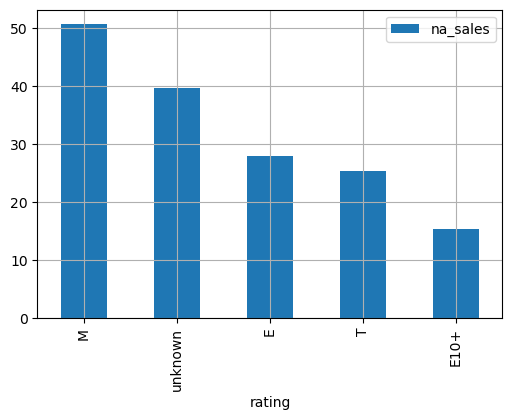

In [67]:
#Построим для наглядности столбчатую диаграмму
rating_na.plot(grid=True, style='o-', kind='bar', figsize=(6,4));

In [68]:
#Составляем рейтинг 'rating' (рейтинг ESRB) для региона EU
rating_eu = data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
.sort_values(by='eu_sales', ascending=False)
rating_eu

,eu_sales
rating,
M,60.56
unknown,40.05
E,37.30
T,25.64
E10+,12.95


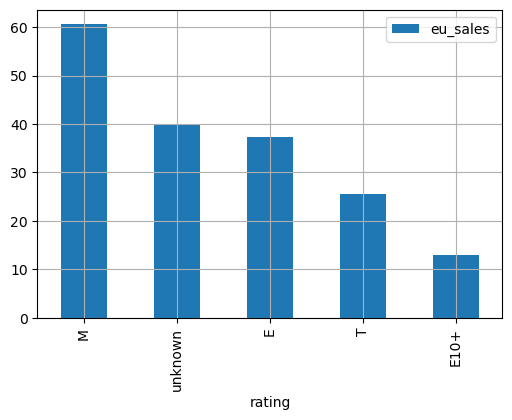

In [69]:
#Построим для наглядности столбчатую диаграмму
rating_eu.plot(grid=True, style='o-', kind='bar', figsize=(6,4));

In [70]:
#Составляем рейтинг 'rating' (рейтинг ESRB) для региона JP
rating_jp = data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
.sort_values(by='jp_sales', ascending=False)
rating_jp

,jp_sales
rating,
unknown,49.42
T,12.03
E,8.27
M,6.20
E10+,4.09


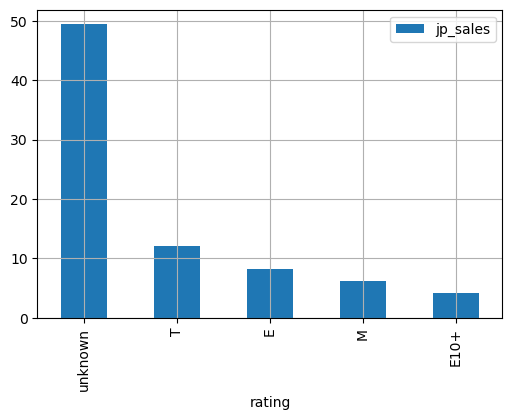

In [71]:
#Построим для наглядности столбчатую диаграмму
rating_jp.plot(grid=True, style='o-', kind='bar', figsize=(6,4));

**Вывод:** По найденным результатам можно сказать, что для регионов NA и EU лучше всего покупаются игры с возрастной категорией 'М' рейтинга ESRB, в Японии лидерами продаж являются игры без рейтинга ESRB, то есть для данного региона рейтинг ESRB не влияет на покупку игры.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

<a id="18-bullet"></a>

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


H_0: Пользовательский рейтинг (user_score_new) платформы "Xbox One" = пользовательский рейтинг (user_score_new) платформы "PC"

H_a: Пользовательский рейтинг (user_score_new) платформы "Xbox One" ≠ пользовательский рейтинг (user_score_new) платформы "PC"

alpha = 0.05

In [72]:
#Создадим выборку по платформе "Xbox One" и удалим пустые строки
data_xone = data_actual.query('platform == "XOne"')['user_score_new'].dropna()

In [73]:
#Посчитаем количество элементов, для корректировки тестирования
data_xone.count()

22

In [74]:
#Создадим выборку по платформе "PC" и удалим пустые строки
data_pc = data_actual.query('platform == "PC"')['user_score_new'].dropna()

In [75]:
#Посчитаем количество элементов, для корректировки тестирования
data_pc.count()

40

Для проведения t-теста используем  метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(). Зададим параметр equal_var=False, потому что нет уверенности, что дисперсии выборок равны, так как их размеры отличаются примерно в 2 раза.

In [76]:
results_one = st.ttest_ind(data_xone, data_pc, equal_var=False) 

alpha = 0.05  

print('p-значение:', results_one.pvalue) 
if results_one.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.4210374450867177
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 42%, следовательно, у нас не получилось отвергнуть нулевую гипотезу: Пользовательский рейтинг (user_score_new) платформы "Xbox One" = пользовательский рейтинг (user_score_new) платформы "PC". То есть средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action и Sports разные

<a id="19-bullet"></a>

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные;


H_0: Пользовательский рейтинг (user_score_new) жанра "Action" = пользовательский рейтинг (user_score_new) жанра "Sports"

H_a: Пользовательский рейтинг (user_score_new) жанра "Action" ≠ пользовательский рейтинг (user_score_new) жанра "Sports"

alpha = 0.05

In [77]:
#Создадим выборку по жанру "Action" и удалим пустые строки
data_action = data_actual.query('genre == "Action"')['user_score_new'].dropna()

In [78]:
#Посчитаем количество элементов, для корректировки тестирования
data_action.count()

132

In [79]:
#Создадим выборку по жанру "Sports" и удалим пустые строки
data_sports = data_actual.query('genre == "Sports"')['user_score_new'].dropna()

In [80]:
#Посчитаем количество элементов, для корректировки тестирования
data_sports.count()

45

Для проведения t-теста используем  метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(). Зададим параметр equal_var=False, потому что нет уверенности, что дисперсии выборок равны, так как их размеры отличаются в 2 раза.

In [81]:
results_two = st.ttest_ind(data_action, data_sports, equal_var=False) 

alpha = 0.05  

print('p-значение:', results_two.pvalue) 
if results_two.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.7994598045690406e-05
Отвергаем нулевую гипотезу


**Вывод:** Значение p-value показывает: вероятность случайно получить такое или большее различие очень маленькое, следовательно, мы отвергаем нулевую гипотезу и принимаем за верную альтернативную гипотезу: Пользовательский рейтинг (user_score_new) жанра "Action" ≠ пользовательский рейтинг (user_score_new) жанра "Sports". То есть средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод


### Вывод

<a id="20-bullet"></a>

**В ходе проекта мы ислледовали данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы. Необходимо было спланировать рекламные кампании на 2017 год, для этого выбрали актуальный промежуток времени: с 2014 года по 2016 год. Проверили и выявили определяющие успешность игры закономерности:**

    - Зависимость продаж игр от региона;
    - Зависимость продаж игр от отзывов критиков;
    - Зависимость продаж игр от платформы;
    - Зависимость продаж игр от жанра;
    - Зависимость продаж игр от рейтинга ESRB;


Для рекламной кампании на 2017 год нашего интернет-магазина «Стримчик» необходимо рассматривать отдельно каждый регион:
___
**Северная Америка:**

- Самые потенциально прибыльные платформы: 

**'PS4'** (доля продаж от общего числа в данном регионе составила 34.2%), 

**'3DS'** (доля продаж от общего числа в данном регионе составила 25.4%)

- Самые востребованные жанры: 

**'Shooter'** (42 млн проданных копий), 

**'Action'** (39.3 млн проданных копий), 

**'Role-Playing'** (23.8 млн проданных копий)

- Рейтинг ESRB: возрастная категория 'М'
___

**Европа:**

- Самые потенциально прибыльные платформы: 

**'PS4'** (доля продаж от общего числа в данном регионе составила 45.4%), 

**'3DS'** (доля продаж от общего числа в данном регионе составила 17.4%)

- Самые востребованные жанры: 

**'Action'** (47.5 млн проданных копий), 

**'Shooter'** (41 млн проданных копий), 

**'Sports'** (24.7 млн проданных копий)

- Рейтинг ESRB: возрастная категория 'М'
___

**Япония:**

- Самые потенциально прибыльные платформы: 

**'3DS'** (доля продаж от общего числа в данном регионе составила 53.1%), 

**'PS4'** (доля продаж от общего числа в данном регионе составила 4.9%)

- Самые востребованные жанры: 

**'Role-Playing'** (29 млн проданных копий), 

**'Action'** (24.3 млн проданных копий), 

**'Fighting'** (4.8 млн проданных копий)

- Рейтинг ESRB: не влияет
___
    
**Также при планировании рекламного бюджета стоит обратить внимание на отзывы критиков**
